<a href="https://colab.research.google.com/github/gabrielagonzalezliliana/PROYECTO_IA_GABRIELA_GONZALEZ/blob/main/PROYECTO_IA_GABRIELA_GONZALEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 1.5 MB/s eta 0:00:00


In [2]:
from groq import Groq

In [3]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=7d5d996e108c55c5fb3c62df0c527554fdbfbdad31e10c00adcada6ca78565e4
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


Error en la solicitud: {"status": "Out of API credits - please enter payment info in your dashboard: https://deepai.org/dashboard"}


Saving SampleSuperstore.csv to SampleSuperstore (25).csv

Resumen del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None

Primeras filas del Dataset:
        Ship Mode    Segment        Country             City       Sta

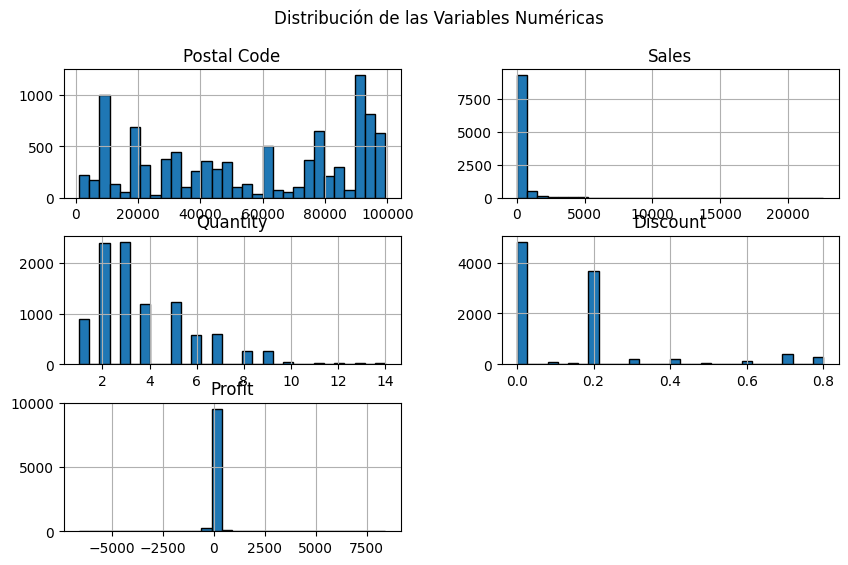

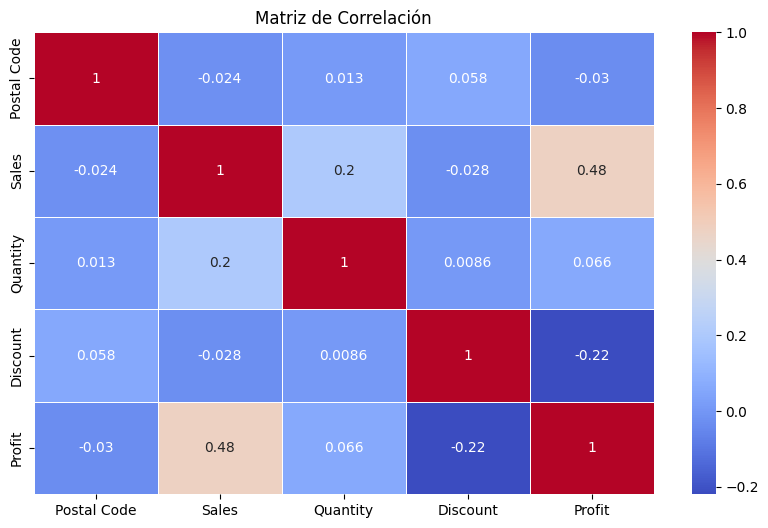

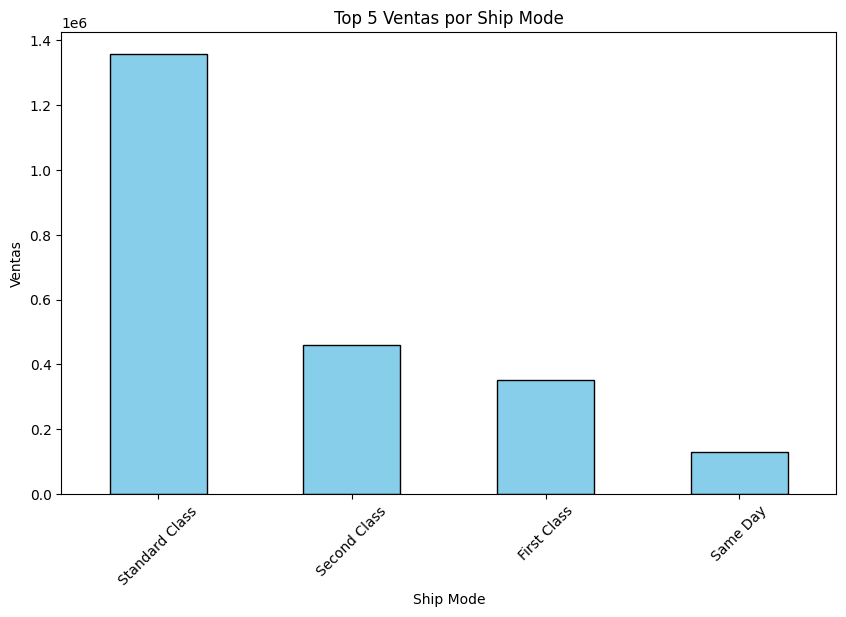

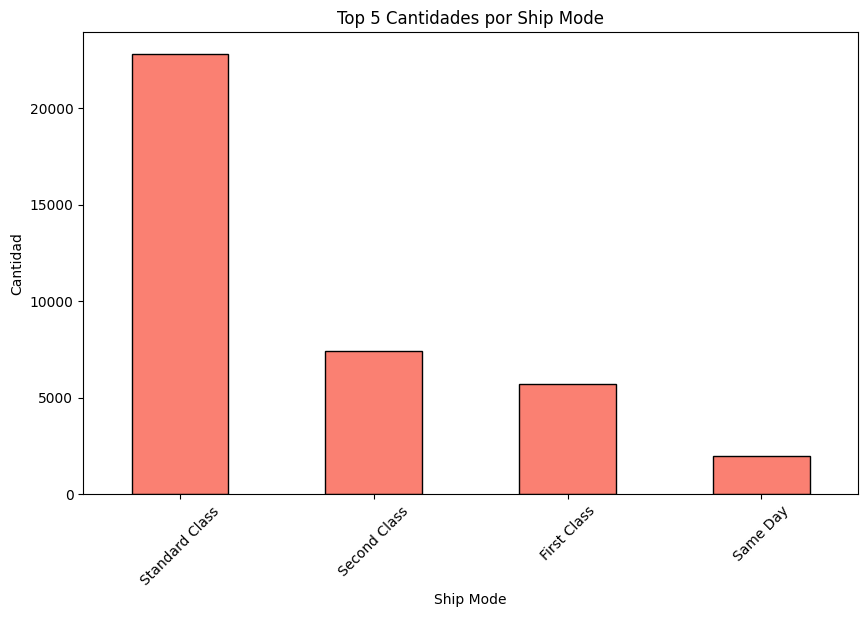

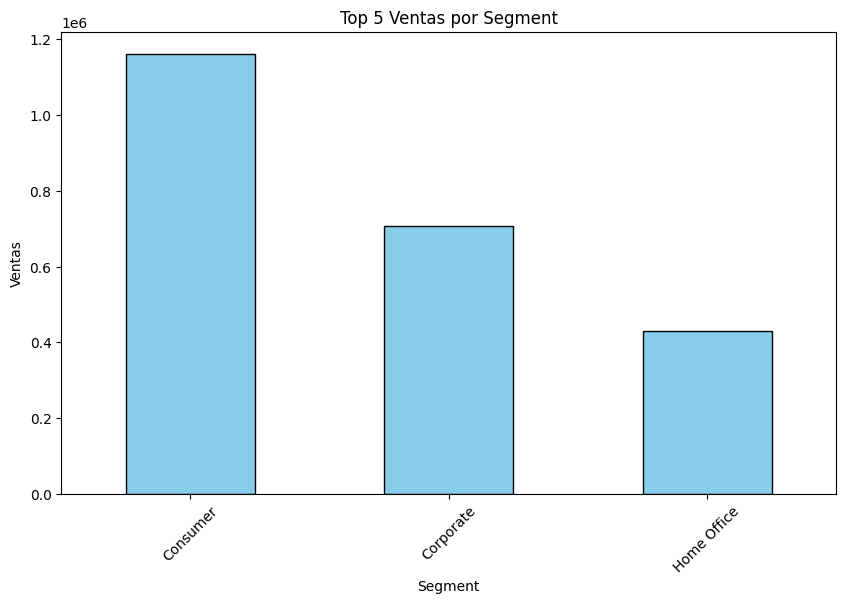

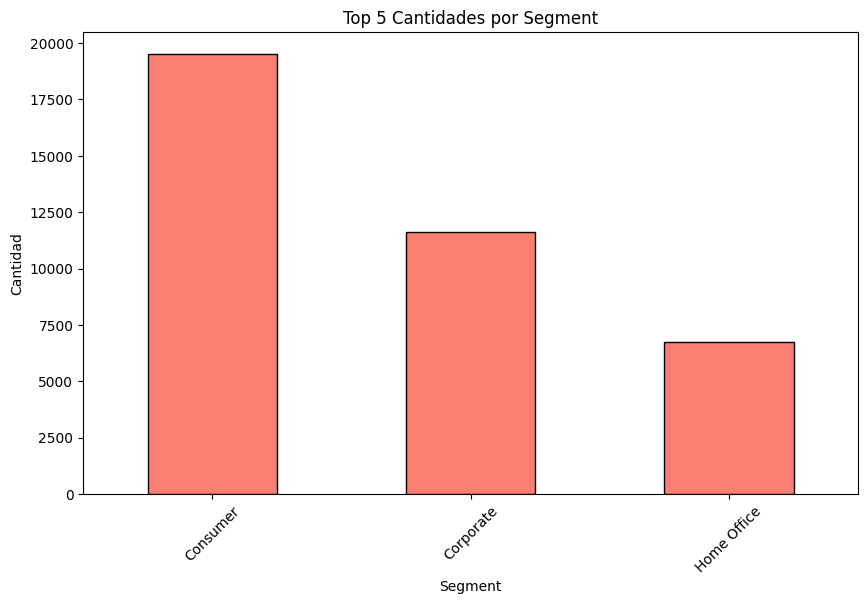

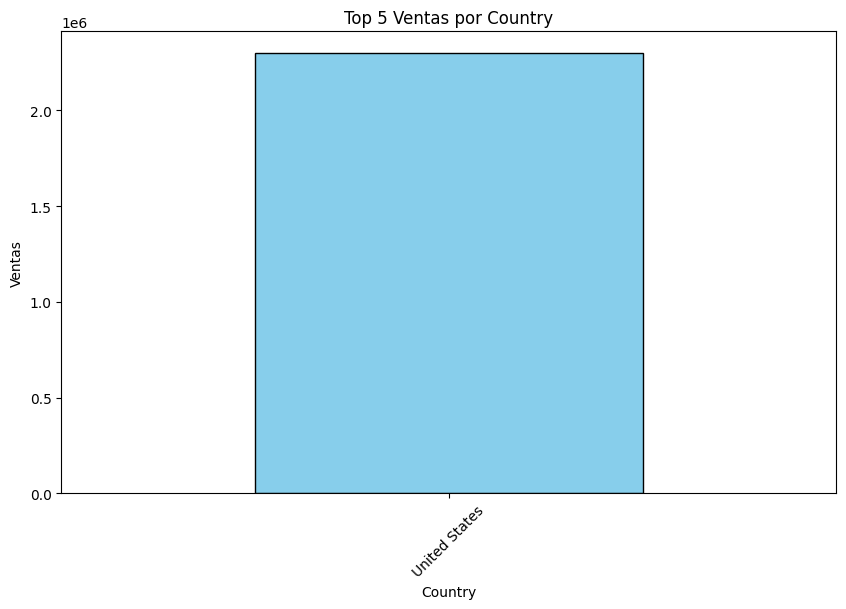

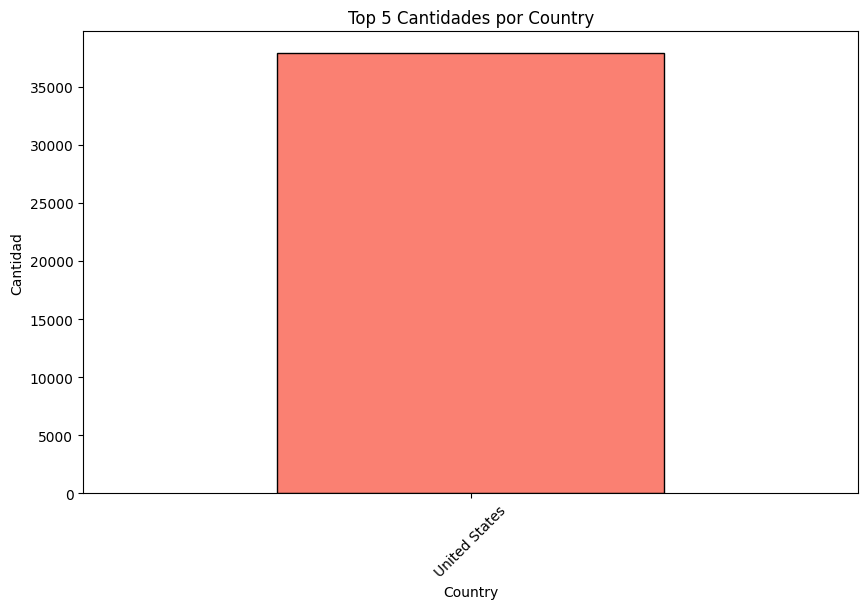

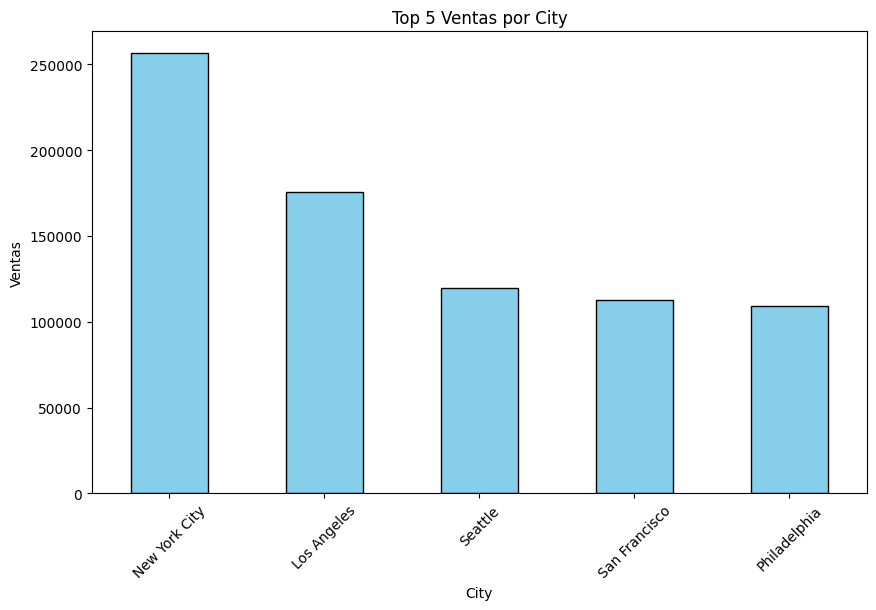

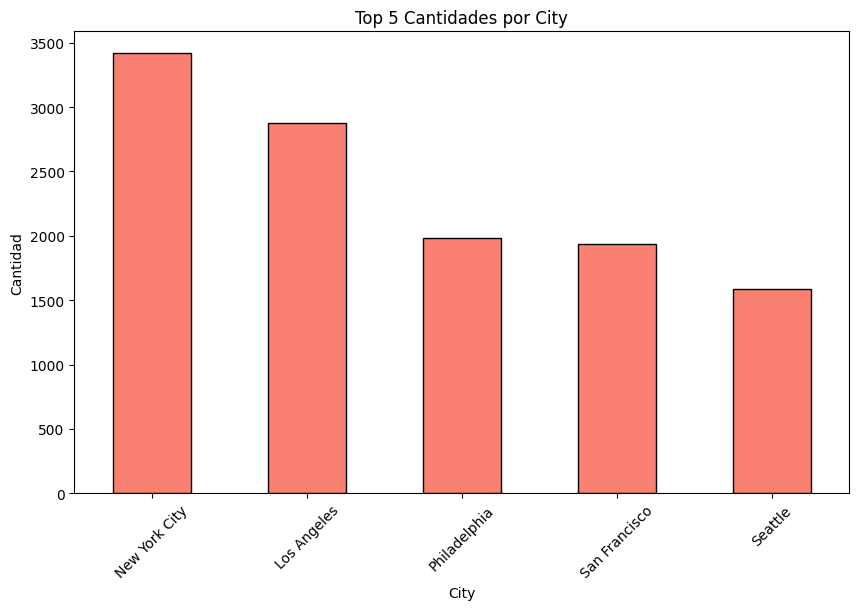

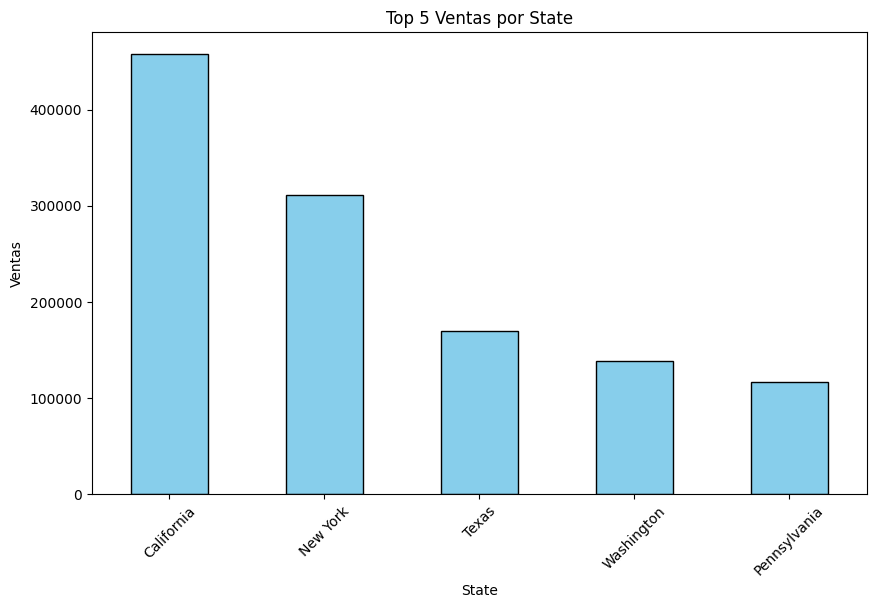

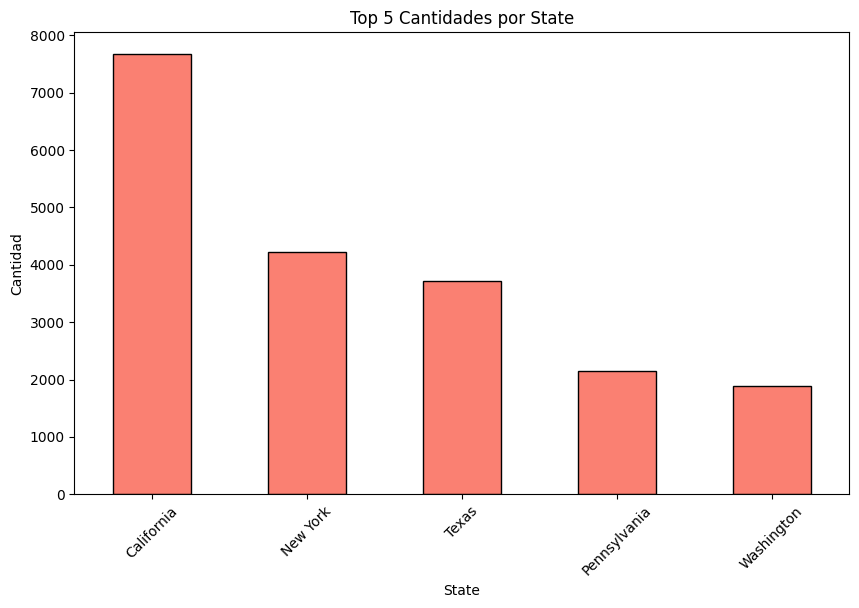

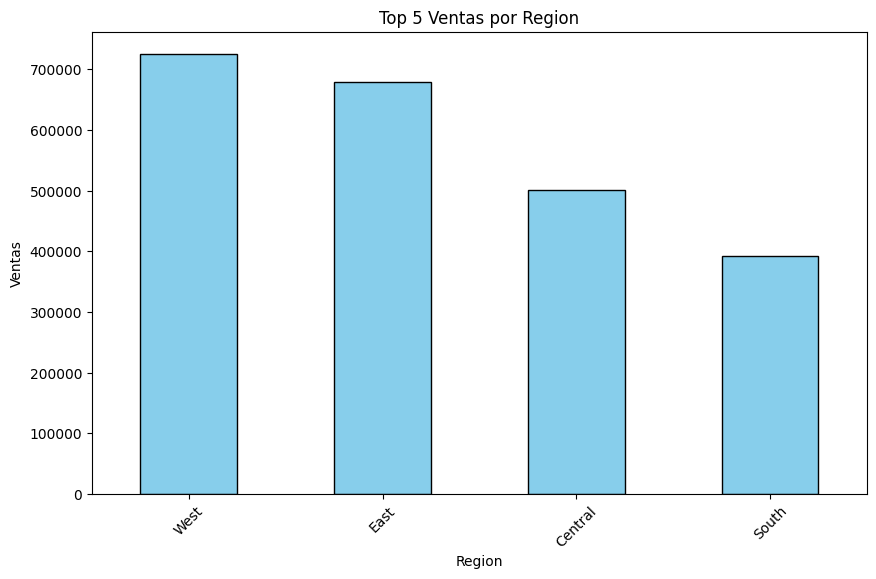

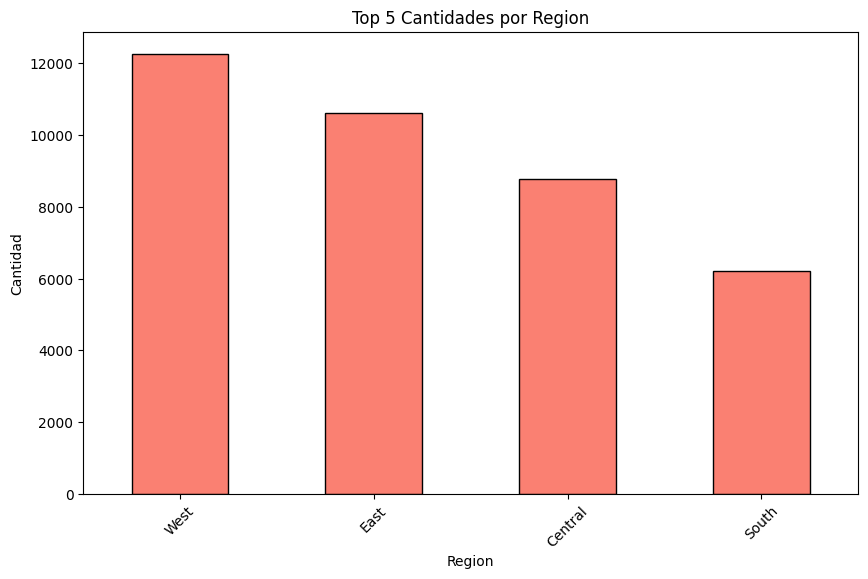

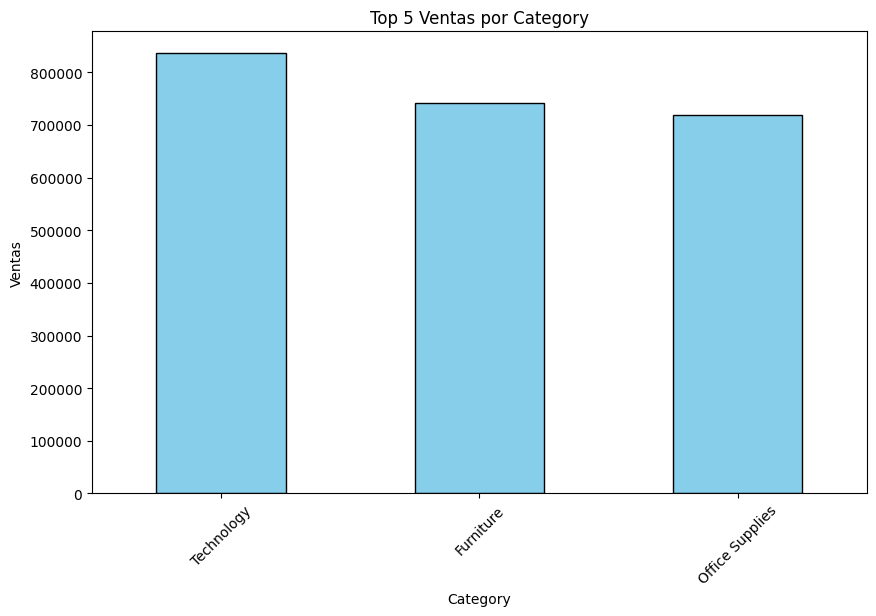

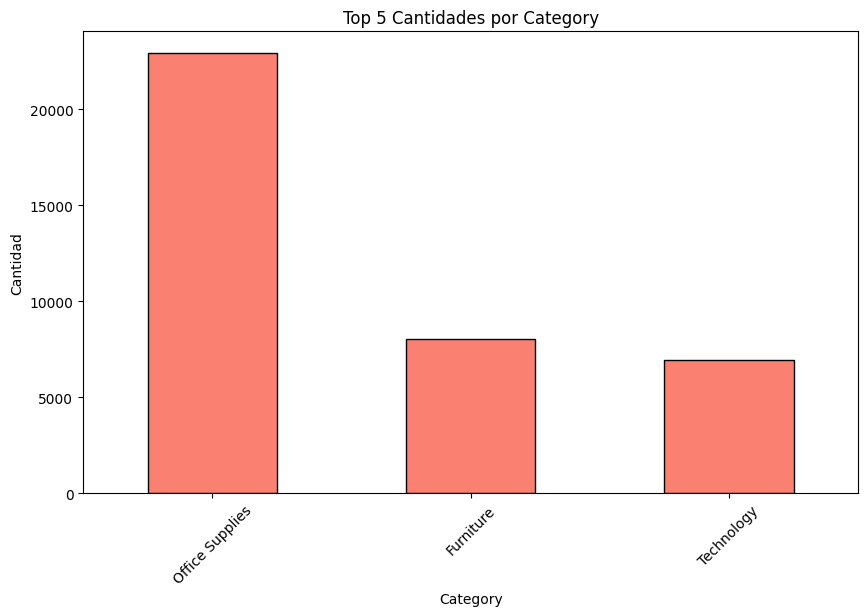

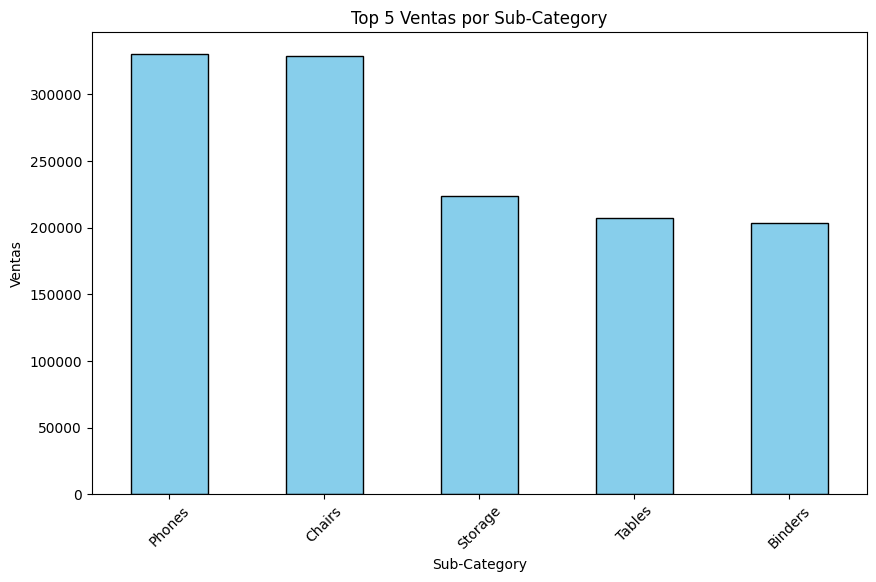

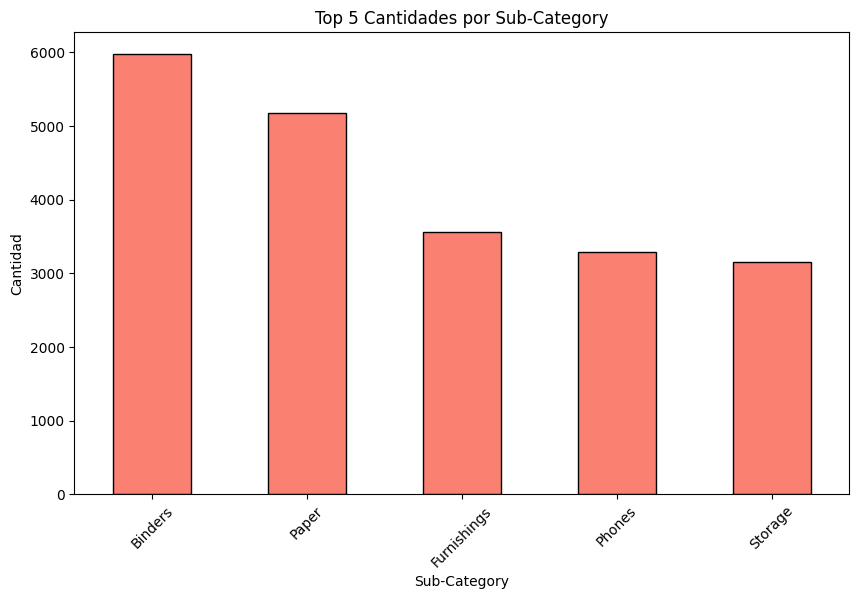


Insights obtenidos:
Total de ventas: 2297199.8603000003
Ticket promedio: 229.8579007704623
Producto más vendido: No disponible

Ventas por Ship Mode:
Ship Mode
Standard Class    1.358216e+06
Second Class      4.591926e+05
First Class       3.514284e+05
Same Day          1.283631e+05
Name: Sales, dtype: float64
Cantidad por Ship Mode:
Ship Mode
Standard Class    22797
Second Class       7423
First Class        5693
Same Day           1960
Name: Quantity, dtype: int64

Ventas por Segment:
Segment
Consumer       1.161400e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64
Cantidad por Segment:
Segment
Consumer       19521
Corporate      11608
Home Office     6744
Name: Quantity, dtype: int64

Ventas por Country:
Country
United States    2.297200e+06
Name: Sales, dtype: float64
Cantidad por Country:
Country
United States    37873
Name: Quantity, dtype: int64

Ventas por City:
City
New York City    256368.161
Los Angeles      175851.341
Seattle          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from google.colab import files
from fpdf import FPDF

# CONFIGURACIÓN: Ingresa tu API Key de Groq
GROQ_API_KEY = "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"
GROQ_ENDPOINT = "https://api.groq.com/openai/v1/chat/completions"

# CONFIGURACIÓN: Ingresa tu API Key de DeepAI
DEEP_AI_API_KEY = "68e15630-90c4-43f3-b5a5-3a327ea01a6b"


headers = {"api-key": DEEP_AI_API_KEY}
payload = {"text": "Genera una imagen abstracta sobre ventas y análisis de datos."}

response = requests.post("https://api.deepai.org/api/text2img", headers=headers, data=payload)

if response.status_code == 200:
    img_url = response.json().get("output_url")
    print("URL de la imagen generada:", img_url)
else:
    print("Error en la solicitud:", response.text)

# 1. Cargar el Dataset
def cargar_dataset():
    uploaded = files.upload()
    for filename in uploaded.keys():
        ruta = filename
    df = pd.read_csv(ruta)
    print("\nResumen del Dataset:")
    print(df.info())
    print("\nPrimeras filas del Dataset:")
    print(df.head())
    return df

# 2. Análisis Exploratorio de Datos (EDA)
def analisis_eda(df):
    print("\nResumen Estadístico:")
    print(df.describe())

    # Visualización de la distribución de las variables numéricas
    df.hist(figsize=(10, 6), bins=30, edgecolor='black')
    plt.suptitle("Distribución de las Variables Numéricas")
    plt.show()

    # Matriz de Correlación
    plt.figure(figsize=(10, 6))
    numerical_df = df.select_dtypes(include=['number'])
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Matriz de Correlación")
    plt.show()

# 3. Extraer Insights con Agrupaciones y Graficar
def extraer_insights(df):
    total_ventas = df["Sales"].sum() if "Sales" in df.columns else "No disponible"
    ticket_promedio = df["Sales"].mean() if "Sales" in df.columns else "No disponible"
    top_producto = df.groupby("Product Name")["Sales"].sum().idxmax() if "Product Name" in df.columns else "No disponible"

    agrupaciones = ["Ship Mode", "Segment", "Country", "City", "State", "Region", "Category", "Sub-Category"]
    agrupaciones_insights = ""

    for col in agrupaciones:
        if col in df.columns:
            agrupacion_sales = df.groupby(col)["Sales"].sum().sort_values(ascending=False)
            agrupacion_quantity = df.groupby(col)["Quantity"].sum().sort_values(ascending=False)

            # Graficar las ventas
            plt.figure(figsize=(10, 6))
            agrupacion_sales.head(5).plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title(f"Top 5 Ventas por {col}")
            plt.xlabel(col)
            plt.ylabel('Ventas')
            plt.xticks(rotation=45)
            plt.show()

            # Graficar las cantidades
            plt.figure(figsize=(10, 6))
            agrupacion_quantity.head(5).plot(kind='bar', color='salmon', edgecolor='black')
            plt.title(f"Top 5 Cantidades por {col}")
            plt.xlabel(col)
            plt.ylabel('Cantidad')
            plt.xticks(rotation=45)
            plt.show()

            agrupaciones_insights += f"\nVentas por {col}:\n{agrupacion_sales.head(5)}\n"
            agrupaciones_insights += f"Cantidad por {col}:\n{agrupacion_quantity.head(5)}\n"

    insights = f"Total de ventas: {total_ventas}\n"
    insights += f"Ticket promedio: {ticket_promedio}\n"
    insights += f"Producto más vendido: {top_producto}\n"
    insights += agrupaciones_insights

    return insights

# 4. Generar Reporte Automático con Groq API
def generar_reporte_groq(insights, prompt_usuario):
    headers = {"Authorization": f"Bearer {GROQ_API_KEY}", "Content-Type": "application/json"}
    prompt = f"{prompt_usuario} \n\n Insights del análisis: {insights}"

    payload = {
        "model": "llama3-8b-8192",
        "messages": [{"role": "user", "content": prompt}],
        "temperature": 0.8,
        "max_tokens": 6000
    }

    response = requests.post(GROQ_ENDPOINT, headers=headers, json=payload)

    if response.status_code == 200:
        reporte = response.json()["choices"][0]["message"]["content"]
        return reporte
    else:
        return "Error en la solicitud a Groq API"

# 5. Generar Imagen basada en el Reporte (DeepAI API)
def generar_imagen_reporte(reporte):
    headers = {"api-key": DEEP_AI_API_KEY}
    payload = {"text": reporte}

    response = requests.post("https://api.deepai.org/api/text2img", headers=headers, data=payload)

    if response.status_code == 200:
        img_url = response.json().get("output_url")
        if img_url:
            img_response = requests.get(img_url)
            with open("reporte_imagen.png", "wb") as f:
                f.write(img_response.content)
            return "reporte_imagen.png"
    return None

# 6. Crear PDF con el Reporte y la Imagen Generada
def crear_pdf(reporte, imagen_path):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Título
    pdf.set_font("Arial", 'B', 16)
    pdf.cell(200, 10, "Reporte Generado por IA", ln=True, align="C")

    # Agregar reporte en texto
    pdf.ln(10)
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, reporte)

    # Agregar la imagen generada
    if imagen_path:
        pdf.ln(10)
        pdf.image(imagen_path, x=10, w=180)

    # Guardar el PDF
    pdf.output("/content/reporte_analisis.pdf")

    return "/content/reporte_analisis.pdf"

# 7. Descargar el PDF generado en Google Colab
def descargar_pdf(pdf_path):
    files.download(pdf_path)

# 8. Ejecutar Análisis Completo
def ejecutar_analisis_completo():
    df = cargar_dataset()
    analisis_eda(df)
    insights = extraer_insights(df)
    print("\nInsights obtenidos:")
    print(insights)

    prompt_usuario = input("Ingrese el prompt para generar el reporte: ")
    reporte = generar_reporte_groq(insights, prompt_usuario)
    print("\nReporte generado por IA:")
    print(reporte)

    imagen_path = generar_imagen_reporte(reporte)
    if imagen_path:
        print("\nImagen generada exitosamente.")

    pdf_path = crear_pdf(reporte, imagen_path)
    print("\nPDF generado exitosamente.")

    descargar_pdf(pdf_path)

# Ejecutar análisis completo
ejecutar_analisis_completo()


PROMPT :"Actúa como un científico de datos especializado en análisis de ventas y genera un informe analítico exhaustivo basado en los insights extraídos del dataset proporcionado. El informe debe ser técnico, estructurado y respaldado por datos, destacando patrones, correlaciones y estrategias de optimización para mejorar la rentabilidad y eficiencia del negocio.

Estructura del Informe:
1. Resumen Ejecutivo
Breve descripción del análisis realizado.
Principales hallazgos sobre el comportamiento de las ventas.
Contexto del negocio y su impacto en la toma de decisiones.
2. Exploración de Datos y Calidad del Dataset
Descripción del dataset analizado: columnas, tipos de datos, valores nulos, duplicados.
Estadísticas descriptivas generales.
Identificación y tratamiento de valores atípicos o inconsistencias.
3. Análisis de Tendencias y Patrones
Evolución de las ventas a lo largo del tiempo (mensual, anual, estacionalidad).
Identificación de temporadas de mayor y menor demanda.
Comparación del rendimiento entre distintas regiones y segmentos de clientes.
Segmentación de clientes según comportamiento de compra.
4. Análisis de Factores Determinantes en las Ventas
Impacto de variables clave:
Descuentos vs. Rentabilidad: ¿Cómo afectan los descuentos al margen de ganancia?
Relación entre cantidad vendida y precio promedio.
Comparación de rendimiento entre distintas categorías y subcategorías de productos.
Métodos de envío y su relación con la satisfacción del cliente y el valor de compra.
Análisis de correlaciones:
Matriz de correlación entre variables clave.
Relación entre tipo de cliente, frecuencia de compra y ticket promedio.
5. Identificación de Anomalías y Puntos Críticos
Detección de valores extremos en ventas, descuentos y cantidades.
Regiones o segmentos con rendimiento inusual.
Posibles errores en la captura de datos o patrones atípicos en la demanda.
6. Modelado Predictivo
Aplicación de modelos de regresión para predecir ventas futuras.
Análisis de componentes principales (PCA) para reducir dimensionalidad y mejorar la interpretación de los datos.
Evaluación del modelo con métricas como R², RMSE y MAE.
7. Recomendaciones Estratégicas Basadas en Datos
Estrategias de optimización de precios y descuentos.
Mejora en la gestión de inventario y predicción de demanda.
Sugerencias para personalizar la experiencia del cliente según el análisis de segmentos.
Acciones para mejorar la rentabilidad y eficiencia operativa basadas en los hallazgos.
8. Conclusión Final y Próximos Pasos
Síntesis de hallazgos clave.
Recomendaciones para futuras optimizaciones y toma de decisiones basadas en datos.
9.EN BASE A LOS DATOS DISPONIBLES ME PODRIAS REALIZAR UNA PREDICCION DE LAS VENTAS PARA LOS PROXIMOS 12 MESES, Y PREDICCIONES EN MONTOS MES A MES, usando distintos modelos de machine learning, y mostrando el rendimiento de cada modelo y cual fue el modelo elegido para las predicciones.


#OTROS PROMPTS PARA PROBAR

PROMPT 1:"Actúa como un científico de datos especializado en análisis de ventas y genera un informe analítico completo basado en los insights extraídos del dataset proporcionado. El informe debe ser técnico, estructurado y respaldado por datos, destacando patrones, correlaciones y posibles estrategias de optimización.

Estructura del Informe:

Resumen Ejecutivo Breve descripción del análisis realizado. Hallazgos más relevantes sobre el comportamiento de las ventas. Contexto del negocio y su impacto en la toma de decisiones.
Exploración de Datos y Calidad del Dataset Descripción del dataset analizado (columnas, tipos de datos, valores nulos, duplicados). Estadísticas descriptivas generales. Identificación y tratamiento de valores atípicos o inconsistencias.
Análisis de Tendencias y Patrones Evolución de las ventas a lo largo del tiempo (tendencias mensuales/anuales). Identificación de temporadas de mayor y menor demanda. Segmentación de clientes según comportamiento de compra.
Análisis de Factores Determinantes en las Ventas Impacto de variables clave: Descuentos vs. Rentabilidad: ¿Cómo afectan los descuentos al margen de ganancia? Relación entre cantidad vendida y precio promedio. Comparación de rendimiento entre distintas categorías y subcategorías de productos. Análisis de correlaciones: Matriz de correlación entre variables clave. Detección de relaciones entre métodos de envío, tipo de cliente y valor de compra.
Identificación de Anomalías y Puntos Críticos Análisis de valores extremos en ventas, descuentos y cantidades. Regiones o segmentos con rendimiento inusual. Posibles errores en la captura de datos o patrones atípicos en la demanda.
Modelado Predictivo (Opcional) Aplicación de modelos de regresión para predecir ventas futuras. Análisis de componentes principales (PCA) para reducir dimensionalidad y mejorar la interpretación de los datos. Métricas de evaluación del modelo (R², RMSE, MAE).
Recomendaciones Estratégicas Basadas en Datos Estrategias de optimización de precios y descuentos. Mejora en la gestión de inventario y predicción de demanda. Sugerencias para personalizar la experiencia del cliente según el análisis de segmentos.
Conclusión Final y Próximos Pasos Síntesis de hallazgos clave. Recomendaciones para futuras optimizaciones y toma de decisiones basadas en datos.

PROMPT 2: "Actúa como un analista de datos especializado en ventas y genera un informe detallado basado en los insights extraídos del análisis de datos. El informe debe incluir:

Resumen Ejecutivo:

Visión general de las ventas, principales hallazgos y contexto del análisis. Tendencias Clave:

Identificación de patrones de ventas. Comportamiento de los productos y categorías más vendidos. Comparación de rendimiento por regiones y segmentos de clientes. Análisis de Factores Determinantes:

Impacto de variables como descuentos, cantidad vendida y método de envío en las ventas. Relación entre márgenes de ganancia y volumen de ventas. Análisis de Anomalías:

Detección de valores atípicos o patrones inusuales en los datos. Explicación de posibles causas y efectos. Recomendaciones Estratégicas:

Acciones basadas en los datos para mejorar la rentabilidad y eficiencia. Sugerencias para optimizar la gestión de inventarios, precios y promociones. Conclusión:

Resumen final con las principales oportunidades de mejora.

Actúa como un científico de datos especializado en análisis de ventas y genera un informe analítico exhaustivo basado en los insights extraídos del dataset proporcionado. El informe debe ser técnico, estructurado y respaldado por datos, destacando patrones, correlaciones y estrategias de optimización para mejorar la rentabilidad y eficiencia del negocio.

Además, realiza una predicción de las ventas para los próximos 12 meses utilizando modelos de Machine Learning adecuados. Proporciona predicciones detalladas mes a mes, incluyendo montos estimados de ventas. Explica qué modelos de predicción aplicaste (por ejemplo, regresión lineal, ARIMA, Prophet, Random Forest, XGBoost, entre otros), y justifica su elección con base en las características de los datos.

Estructura del Informe:
1. Resumen Ejecutivo
Breve descripción del análisis realizado.
Principales hallazgos sobre el comportamiento de las ventas.
Contexto del negocio y su impacto en la toma de decisiones.
2. Exploración de Datos y Calidad del Dataset
Descripción del dataset analizado: columnas, tipos de datos, valores nulos, duplicados.
Estadísticas descriptivas generales.
Identificación y tratamiento de valores atípicos o inconsistencias.
3. Análisis de Tendencias y Patrones
Evolución de las ventas a lo largo del tiempo (mensual, anual, estacionalidad).
Identificación de temporadas de mayor y menor demanda.
Comparación del rendimiento entre distintas regiones y segmentos de clientes.
Segmentación de clientes según comportamiento de compra.
4. Análisis de Factores Determinantes en las Ventas
Impacto de variables clave:
Descuentos vs. Rentabilidad: ¿Cómo afectan los descuentos al margen de ganancia?
Relación entre cantidad vendida y precio promedio.
Comparación de rendimiento entre distintas categorías y subcategorías de productos.
Métodos de envío y su relación con la satisfacción del cliente y el valor de compra.
Análisis de correlaciones:
Matriz de correlación entre variables clave.
Relación entre tipo de cliente, frecuencia de compra y ticket promedio.
5. Identificación de Anomalías y Puntos Críticos
Detección de valores extremos en ventas, descuentos y cantidades.
Regiones o segmentos con rendimiento inusual.
Posibles errores en la captura de datos o patrones atípicos en la demanda.
6. Modelado Predictivo
Aplicación de modelos de regresión y series temporales para predecir ventas futuras.
Justificación de los modelos utilizados (Regresión Lineal, ARIMA, Prophet, Random Forest, XGBoost, etc.).
Evaluación del modelo con métricas como R², RMSE y MAE.
Predicciones mes a mes de ventas para los próximos 12 meses con visualización gráfica.
7. Recomendaciones Estratégicas Basadas en Datos
Estrategias de optimización de precios y descuentos.
Mejora en la gestión de inventario y predicción de demanda.
Sugerencias para personalizar la experiencia del cliente según el análisis de segmentos.
Acciones para mejorar la rentabilidad y eficiencia operativa basadas en los hallazgos.
8. Conclusión Final y Próximos Pasos
Síntesis de hallazgos clave.
Recomendaciones para futuras optimizaciones y toma de decisiones basadas en datos."
